In [1]:
cd "nilm data\all"

D:\jjenko\nilm data\all


In [2]:
from nilmtk import DataSet
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 10)
plt.figure(figsize=(10,30))

dataset_name = "ukdale"
dataset = DataSet(dataset_name+'.h5')
#dataset.set_window(start='2011-1-17T1800',end='2011-9-18T1900')
#dataset.set_window(start='2012-9-17T1800',end='2012-11-18T1900')

##for redd
#washer dryer is broken, dish washer is rarely used (filter out the noise), electric stove is rarely used, space heater is rarely used 

#manualy_selected_appliances = ["microwave","washer dryer", "dish washer","electric stove","electric oven","fridge","electric space heater","light"]    
#date_range = pd.date_range("2010-1-10T0000", "2012-5-20T0000",freq=f'{step_in_mins}''T')

<Figure size 720x2160 with 0 Axes>

# THE GENERATOR

Prior to running generator, run cell bellow to define functions


In [30]:
#--PARAMTERS--# 
#-step
p.step_in_mins = 13
#-image
max_dataset_size = 1000 #max number of images per appliance per buidling 
img_size = 100 # means img_size x img_size (igored when using RECC)
n_of_multi_dim_imgs = 10 #change to 0 for normal images (read overlap)
allowed_delta_between_images = 10 #allowed missing images between images 

#-samples
sample_period = 6 # cm be obtained from dataset.metadata["sample_period"] but it is inconsistent
percentage_of_missing_data_allowed = 0.73 # is necessary since sampling rate is inconsistent or samples are missing 

#-brightness
add_brightness = "Y"

#-timeseries
ts_save = "N" # "Y" - save soruce time-series data to output GAF dataset. "N" - do not save ts data
ts_size = round(p.step_in_mins*60/sample_period) # calculate estimate size of ts

#-trans type
trs_type = "GAF" #GAF or RECU - Gramian Angural Field or Recurrance plot

#-if trans type GAF 
trs_type_gaf = "GASF" # GASF or GADF

#-overlap images (read comments bellow!)
overlap_images = False #True or false 
overlap_images_by_n = 0 #how many images should overlap  **will make n_of_multi_dim_imags shorter by overlap_image_by_n!!!***

#-Optimizing 
use_good_sections = "N"

if overlap_images==False : overlap_images_by_n = 0; # safety! 

#-buildings
n_buildings = len(dataset.buildings)
multiple_buildings = "N" # multiple buildings Y on N
selected_building = 2 # is used in case parameter multiple buidlings is N


if multiple_buildings == "Y":
    selected_building = "A"

#-classes and approximate date range
if dataset.metadata["name"] == "REDD":

    start_date = "2010-1-10T0000"
    end_date = "2012-5-20T0000"
    #appliances for redd
    #manualy_selected_appliances = ["microwave","washer dryer", "dish washer","electric stove","electric oven","fridge","electric space heater","light"]
    manualy_selected_appliances = ["light","fridge","microwave","washer dryer","dish washer","air conditioner"]
    

elif dataset.metadata["name"] == "iAWE":
    start_date = "2013-1-18T1800"
    end_date = "2013-12-18T1900"
    #applicances for iawe 
    manualy_selected_appliances = ["fridge","television","clothes iron","washing machine","computer","air conditioner"]

elif dataset.metadata["name"] == "UK-DALE":
    start_date = "2013-1-10T0000"
    end_date = "2014-2-20T0000"
    #appliances for ukdale
    #manualy_selected_appliances = ["HTPC","dish washer","server computer","freezer","fridge freezer","desktop computer","light","computer monitor", "laptop computer", "television", "washer dryer", "microwave","boiler","toaster","kettle","fridge"]
    #manualy_selected_appliances = ["dish washer","washer dryer","microwave","boiler","toaster","kettle"]
    #manualy_selected_appliances = ["computer monitor", "laptop computer", "television", "washer dryer", "microwave","boiler","toaster","kettle","fridge"]
    manualy_selected_appliances = ["fridge"]

elif dataset.metadata["name"] == "REFIT":
    start_date = "2013-10-10T0000"
    end_date = "2015-8-20T0000"
    #appliances for refit
    manualy_selected_appliances = ['washing machine','television','microwave','fridge freezer','dish washer','kettle','fridge','computer',"toaster"]
    #bulding 4 only
    #manualy_selected_appliances = ['fridge freezer','computer','television','tumble dryer','dish washer','washing machine','microwave']
    
elif dataset.metadata["name"] == "ECO":
    start_date = "2012-06-10T0000"
    end_date = "2013-03-20T0000"
    #appliances for eco
    manualy_selected_appliances = ["HTPC","freezer", "fridge", "kettle", "coffee maker", "computer","laptop computer","microwave","lamp","washing machine","dish washer"]

else:
    print("error: dataset used is not compatible with this parser!")
    raise  

date_range = pd.date_range(start_date,end_date,freq=f'{p.step_in_mins}''T') 

#main parameters - these are arrays that will hold all of the appended data
#save parameters
 
printLog("dataset name: ",dataset.metadata["name"],", date : ",datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')," \n"

"using data from ",date_range[0]," to ", date_range[-1]," \n"

" using appliances: ",manualy_selected_appliances,"\n"

" transtype: "f"{trs_type}","\n"
" gaf trans type: "f"{trs_type_gaf}","\n"

" windows size in mins: "f"{p.step_in_mins}","\n"
" image size in pixels: "f"{img_size}","\n"

" sample period: "f"{sample_period}","\n"

" number if images that are stacked together and in series(series!): "f"{n_of_multi_dim_imgs}","\n"
" allowed max delta between images  "f"{allowed_delta_between_images}","\n"

" added brightness:  "f"{add_brightness}","\n"

" overlap multidim images: "f"{overlap_images}","\n"
" overlap multidim images by number of: "f"{overlap_images_by_n}","\n"
" true number of images stacked together due to overlaping is: "f"{n_of_multi_dim_imgs-overlap_images_by_n}","\n"

" save source timeseries: "f"{ts_save}","\n"

" number of appliances: "f"{len(manualy_selected_appliances)}","\n"
" number of buildings: "f"{n_buildings}","\n"

" max number of images per appliance per building: "f"{max_dataset_size}","\n"
" max number of images per appliance: "f"{max_dataset_size*n_buildings}","\n"
" max number of images (real number is always smaller): "f"{max_dataset_size*n_buildings*len(manualy_selected_appliances)}","\n"

" include multiple buildings (Y for Yes N for No): "f"{multiple_buildings}","\n"
" building selected: "f"{selected_building}","\n"

" using optimized version with good sections: " f"{use_good_sections}","\n"
)


file_name = create_file(dataset.metadata["name"],p.step_in_mins,max_dataset_size*n_buildings*len(manualy_selected_appliances),img_size,n_of_multi_dim_imgs,manualy_selected_appliances,ts_save=ts_save,trs_type=trs_type,trs_type_gaf=trs_type_gaf,n_buildings=n_buildings,

multiple_buildings=multiple_buildings,selected_building=selected_building,overlap_images=overlap_images,overlap_images_by_n=overlap_images_by_n,add_brightness=add_brightness)


#handle case where:
if trs_type == "RECU":
    img_size = ts_size # recc tf output is same size as input ts

if n_of_multi_dim_imgs != 0:
    #use 4 dims
    gasf_stack_main = np.zeros([0,n_of_multi_dim_imgs,img_size,img_size])
    ts_stack_main = np.zeros([0,n_of_multi_dim_imgs,ts_size])

    if overlap_images == True:
        #multidim size will be a bit smaller, due to overlap
        gasf_stack_main = np.zeros([0,n_of_multi_dim_imgs-overlap_images_by_n,img_size,img_size])
        ts_stack_main = np.zeros([0,n_of_multi_dim_imgs-overlap_images_by_n,ts_size])

else:
    #use 3 dims
    gasf_stack_main = np.zeros([0,img_size,img_size])
    ts_stack_main = np.zeros([0,ts_size])

label_stack = np.zeros(0)
label_building = np.zeros(0)

appliance_weights = np.zeros(0)
healthy_appliances = []

last_interval = 0
breaker_stack_full = False

max_dataset_size_tmp  = 0
max_dataset_size_tmp_last = 0

all_images_stacked = 0

#counter will count how many images are empty how many are half full and how many are full
counter_empty = 0
counter_halfull = 0
counter_halfull_list = []
counter_full = 0

counter_noentropy = 0
counter_entropy = 0
counter_nodata = 0
counter_data = 0
counter_deltatohigh = 0
counter_gooddelta = 0
#the idea is to loop through all of the applianes and collect at least N of "max_dataset_size" images for each one
for appliance in manualy_selected_appliances:
    printLog("\n")
    printLog("starting "f"{appliance} ("+str(manualy_selected_appliances.index(appliance)+1)+"/"+str(len(manualy_selected_appliances))+"):")
    print("\n")
    print("starting "f"{appliance} ("+str(manualy_selected_appliances.index(appliance)+1)+"/"+str(len(manualy_selected_appliances))+"):")
    
    #define and reset metric
    applainces_stacked = 0
    
    for building in dataset.buildings:
        
        #check if user selected mutli dim images
        if n_of_multi_dim_imgs != 0:
            gasf_stack_tmp = np.zeros([0,img_size,img_size])
            ts_stack_tmp = np.zeros([0,ts_size])

            gasf_stack = np.zeros([0,n_of_multi_dim_imgs,img_size,img_size])
            ts_stack = np.zeros([0,n_of_multi_dim_imgs,ts_size])

            if overlap_images == True:
                #multidim size will be a bit smaller
                gasf_stack = np.zeros([0,n_of_multi_dim_imgs-overlap_images_by_n,img_size,img_size])
                ts_stack = np.zeros([0,n_of_multi_dim_imgs-overlap_images_by_n,ts_size])
    
        else:
            gasf_stack = np.zeros([0,img_size,img_size])
            ts_stack = np.zeros([0,ts_size])
    

        # use only 1st building if muliple_buildings == "NO"
        if multiple_buildings == "N":
                if int(building)  != selected_building:
                    print("skipping building "f"{building}"" due to parameter muliple_buildings ")
                    continue
        
        dataset.set_window(start_date,end_date)

        for meter in dataset.buildings[building].elec.submeters().meters:
            
            # get name and instance of an appliance from metadata
            appliance_metadata = meter.appliances[0].metadata
            label = appliance_metadata.get("type")
            instance = appliance_metadata.get("instance")
            
            #select only appliance that is selected in the first loop
            if label != appliance : continue

            #max_dataset_size_tmp = max_dataset_size + gasf_stack.shape[0]
            last_dataset_size = gasf_stack.shape[0]
            
            #get goodsections of the appliance
            if use_good_sections == "Y": #good sections speed up the process
                try:
                    good_sections = meter.good_sections() #array of sections with start and end date 
                except:
                    print("hdf error!")
                    printLog("hdf error!")
                    good_sections = [[start_date,end_date]] # use whole interval in case of an error 
                    
                    continue
            
            else: # do not use good sections

                good_sections = [[start_date,end_date]] #good section is simply array from start to end
                
            
            #needed for progress bar
            N_of_sections = len(good_sections) 
            section_counter = 0
            
            #set breaker for when stack is full
            breaker_stack_full = False

            for section in good_sections:
                
                section_counter += 1
                
                #slice data between two healthy sections 
                #if isinstance(good_sections, (list, tuple)):
                if type(good_sections) == type(list()): #in case that good_sections is simply whole interval reading is different. 
                    date_range = pd.date_range(section[0], section[1],freq=f'{p.step_in_mins}''T')

                else:#in this case type is nilmtk.timeframe.timeframe and reading is different 
                    date_range = pd.date_range(section.start.replace(tzinfo=None), section.end.replace(tzinfo=None),freq=f'{p.step_in_mins}''T')

                #define number of dates inside sections

                N_of_dates = len(date_range)-2
                
                # http://nilmtk.github.io/nilmtk/master/_modules/nilmtk/stats/goodsections.html 
                if N_of_dates < 2: continue

                
                #break out of two for loops (interval and meters )
                if breaker_stack_full:
                    #print("breaker, full!")
                    break

                for interval in range(N_of_dates):
                    
                    print("\r",
                        " data procesed: ",round(100*section_counter/(N_of_sections),2),"% ",
                        " data procesed per section: ",round(100*interval/(N_of_dates-1),2),"% ",
                        " finished: ",round(100*((gasf_stack.shape[0])/max_dataset_size),2),"% | ",
                        " building ",building," | ",
                        end="")
        
                    #try to read from dataset
                    try:
                        dataset.set_window(start=date_range[interval],end=date_range[interval+1])
                        df = next(meter.load(physical_quantity='power'))
                        counter_data +=1
                    except:
                        counter_nodata +=1
                        #uncomment fo debug
                        #print("problem, no data for "+appliance+"!")
                        continue
                    
                    #do some metric calcs in order to determine if selected window needs to be dropped
                    metric = (60*p.step_in_mins)/sample_period # will adjust automaticly
                    if len(df) < percentage_of_missing_data_allowed*metric:# -> manualy select %
                        #uncomment for debug
                        
                        if len(df) != 0:
                            counter_halfull += 1
                            counter_halfull_list.append([counter_halfull, int(100*(len(df))/metric) ])
                            #     print("skipped: "+str(date_range[interval])+" had only "+str(len(df))+" out of "+str(metric)+" points ("+str(int(100*(len(df))/metric))+"%)")
                        else: 
                            counter_empty += 1

                        continue 
                    else:
                        counter_full += 1
                    
                    #read power data and write it to timeseries
                    try:
                        ts = df.fillna(0).power.active.values.transpose()
                    except:
                        print("no active power!")
                        printLog("no active power!")
                        try:
                            print("using apparent power!")
                            printLog("using apparent power!")
                            ts = df.fillna(0).power.apparent.values.transpose()
                        except:
                            print("no apparent power!")
                            printLog("no apparent power!")
                            continue

                    #check if all values in an array are equal to 0
                    All_zero = np.all(ts==0)  
                    All_ones = np.all(ts==1)  
                    All_equal = np.all(ts==ts[0])
                    All_lessthan = np.all(ts < 15 ) #if consumed power is lower than 20 watts (gets rid of noise and dark current. No device used uses less than 15W)

                    if All_zero == True or All_ones == True or All_equal == True  or All_lessthan == True :
                        #print("skipped due all zero or all one: timeseries:")
                        #if all values are 0 then skip
                        counter_noentropy +=1
                        continue
                    
                    counter_entropy += 1
                        
                            
                    #check if dataset size is larger than specified
                    if gasf_stack.shape[0] >= (max_dataset_size):
                        print("max DS size reached size of "f"{max_dataset_size}"", skipping!")   
                        printLog("max DS size reached size of "f"{max_dataset_size}"", skipping! dataset size: ", gasf_stack.shape[0])
                        breaker_stack_full = True
                        break

                    #calculate mean value of timeseries, that will be multiplied to the matrix. 
                
                    ts_mean = ts[ts != 0].mean()

                    #do some timeseries reshaping and padding 
                    #add new axis to for padding and gafs
                    ts = ts[np.newaxis,:]
                    if ts.shape[1] <= ts_size:
                        ts_pad = np.pad(ts, [(0,0),(0, ts_size-ts.shape[1])], 'constant')
                    else:
                        #handle edge case
                        ts_pad = ts[:,:ts_size]


                    #recurrence transform
                    if trs_type == "RECU":
                        rp = RecurrencePlot(threshold=None)
                        X_gasf = rp.fit_transform(ts_pad)

                    #gaf transform
                    if trs_type == "GAF":
                        
                        # Transform the time series into Gramian Angular Fields
                        if trs_type_gaf == "GASF":
                            gasf = GramianAngularField(image_size=img_size, method='summation')
                            X_gasf = gasf.fit_transform(ts_pad)
            
                           

                        if trs_type_gaf == "GADF":
                            gadf = GramianAngularField(image_size=img_size, method='difference')
                            X_gasf = gadf.fit_transform(ts_pad)

                           
                    
                    #multiply mean (exluding zero) has similar effect as image brightness
                    if add_brightness == "Y":
                        X_gasf = X_gasf*ts_mean

                    #part where we save converted images
                    if len(gasf_stack.shape) == 4:

                        #append as multi dimensonal images 
                        if gasf_stack_tmp.shape[0] < n_of_multi_dim_imgs:
                            
                            #images in multi dim array must be in strict series order
                            delta_interval = interval - last_interval 
                            last_interval = interval
                            
                            if delta_interval <= allowed_delta_between_images: 

                                #append, images are strictly in series
                                gasf_stack_tmp = np.append(gasf_stack_tmp,X_gasf,axis=0)
                                ts_stack_tmp = np.append(ts_stack_tmp,ts_pad,axis=0)
                                #print("series di,", delta_interval)
                                counter_gooddelta +=1
                            else:

                                #reset stack to 0
                                ts_stack_tmp = np.zeros([0,ts_size])
                                gasf_stack_tmp = np.zeros([0,img_size,img_size])
                                #print("skip di,", delta_interval)
                                counter_deltatohigh += 1

                        else:
                            #full 
                            if overlap_images == True:
                                #overlap
                                gasf_stack_tmp_new_axis = gasf_stack_tmp[np.newaxis,0:len(gasf_stack_tmp)-overlap_images_by_n] #add new axis for compatability 
                                gasf_stack = np.append(gasf_stack,gasf_stack_tmp_new_axis,axis=0)
                                
                                ts_stack_tmp_new_axis = ts_stack_tmp[np.newaxis,0:len(gasf_stack_tmp)-overlap_images_by_n] #add new axis for compatability
                                ts_stack = np.append(ts_stack,ts_stack_tmp_new_axis,axis=0)
                                
                                #save some values that will overlap
                                gasf_stack_tmp = gasf_stack_tmp[len(gasf_stack_tmp)-overlap_images_by_n:]
                                ts_stack_tmp_tmp = ts_stack_tmp[len(ts_stack_tmp)-overlap_images_by_n:]
                                
                            
                            else:
                                #do not overlap
                                gasf_stack_tmp = gasf_stack_tmp[np.newaxis, ...] #add new axis for compatability
                                gasf_stack = np.append(gasf_stack,gasf_stack_tmp,axis=0)
                                
                                ts_stack_tmp = ts_stack_tmp[np.newaxis, ...] #add new axis for compatability
                                ts_stack = np.append(ts_stack,ts_stack_tmp,axis=0)

                                #reset stack to 0
                                ts_stack_tmp = np.zeros([0,ts_size])
                                gasf_stack_tmp = np.zeros([0,img_size,img_size])

                    else:
                        #append as ordinary images
                        gasf_stack = np.append(gasf_stack,X_gasf,axis=0)
                        ts_stack = np.append(ts_stack,ts_pad,axis=0)

                    if interval == N_of_dates-2:
                        printLog("last interval, dataset size: ", gasf_stack.shape[0])

        
        group_path = f"{dataset_name}""/"f"{appliance}""/"f"{building}"""
        
        if gasf_stack.shape[0] > 0:
            store_many_hdf5(gasf_stack[...,np.newaxis],group_path,"gaf",force_del="yes")
            applainces_stacked += gasf_stack.shape[0]
            all_images_stacked += gasf_stack.shape[0]
            healthy_appliances.append(appliance)
            if ts_save == "Y":
                store_many_hdf5(ts_stack,"data","ts",force_del="yes")

        else:
            print("empty for building",building,"appliance",appliance)
  

        print("finished building N",building)#,"status: data procesed: ",round(section_counter/(N_of_sections),2),"% ")
        printLog("finished building N",building)#,"status: data procesed: ",round(section_counter/(N_of_sections),2),"% ")

       

    printLog("")
    printLog("number of images (per appliance) stacked: "f"{applainces_stacked}")
    print("")
    print("number of images (per appliance) stacked: "f"{applainces_stacked}")

   
    # if gasf_stack.shape[0] > 1:
        
    #     gasf_stack_main = np.append(gasf_stack_main,gasf_stack,axis=0)
    #     ts_stack_main = np.append(ts_stack_main,ts_stack,axis=0)

    #     appliance_weights = np.append(appliance_weights,round(gasf_stack.shape[0]/(max_dataset_size*len(dataset.buildings)),2))
    #     healthy_appliances.append(appliance)

    # else:
        
    #     printLog("no usefull data for "f"{appliance}"" found, skipping")
    

    # if gasf_stack.shape[0] == 1:
    #     #edge case where there is only one image (we need atleast two)
    #     label_stack = np.delete(label_stack, -1,0) #delete last instance if labels
    #     label_building = np.delete(label_building,-1,0)#delete last instance if buliding label
    #     #images get overwriten and appliances do not get added ()


    printLog("finished "f"{appliance}")
    print("finished "f"{appliance}")
    
    print("\n")
    printLog("\n")

# finished, store the images    

# gasf_stack_main = gasf_stack_main[...,np.newaxis]
# store_many_hdf5(gasf_stack_main,"data","gasf",force_del="yes")
# store_many_hdf5(label_stack,"labels","gaf",force_del="yes",label=True)
# store_many_hdf5(label_building,"labels","building",force_del="yes",label=True)
# if ts_save == "Y":
#     store_many_hdf5(ts_stack_main,"data","ts",force_del="yes")

printLog("num of images stored: ", all_images_stacked)
print("num of images stored: ", all_images_stacked)
printLog("appliances stored: ", healthy_appliances)
print("appliances stored: ", healthy_appliances)

creating new file! ...


starting fridge (1/1):
skipping building 1 due to parameter muliple_buildings 
  data procesed:  100.0 %   data procesed per section:  100.0 %   finished:  93.2 % |   building  2  | storing... samples to store: 932
finshed. stored to UK-DALE_H_test_GASF_13m_100S10X_1A5000N_2B_N-O_Y-S_AVG-Y/ukdale/fridge/2/gaf
finished building N 2
skipping building 3 due to parameter muliple_buildings 
skipping building 4 due to parameter muliple_buildings 
skipping building 5 due to parameter muliple_buildings 

number of images (per appliance) stacked: 932
finished fridge


num of images stored:  932
appliances stored:  ['fridge']


In [ ]:
class parameters:
    def __init__(self) -> None:
        pass
p = parameters()
p.dataset_name = dataset_name

In [5]:
path = "D:/jjenko/nilm data/GAF_DS/"

def printLog(p):
    saveLog("dataset name: ",dataset.metadata["name"],", date : ",datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')," \n"

    "using data from ",date_range[0]," to ", date_range[-1]," \n"

    " using appliances: ",manualy_selected_appliances,"\n"

    " transtype: "f"{trs_type}","\n"
    " gaf trans type: "f"{trs_type_gaf}","\n"

    " windows size in mins: "f"{step_in_mins}","\n"
    " image size in pixels: "f"{img_size}","\n"

    " sample period: "f"{sample_period}","\n"

    " number if images that are stacked together and in series(series!): "f"{n_of_multi_dim_imgs}","\n"
    " allowed max delta between images  "f"{allowed_delta_between_images}","\n"

    " added brightness:  "f"{add_brightness}","\n"

    " overlap multidim images: "f"{overlap_images}","\n"
    " overlap multidim images by number of: "f"{overlap_images_by_n}","\n"
    " true number of images stacked together due to overlaping is: "f"{n_of_multi_dim_imgs-overlap_images_by_n}","\n"

    " save source timeseries: "f"{ts_save}","\n"

    " number of appliances: "f"{len(manualy_selected_appliances)}","\n"
    " number of buildings: "f"{n_buildings}","\n"

    " max number of images per appliance per building: "f"{max_dataset_size}","\n"
    " max number of images per appliance: "f"{max_dataset_size*n_buildings}","\n"
    " max number of images (real number is always smaller): "f"{max_dataset_size*n_buildings*len(manualy_selected_appliances)}","\n"

    " include multiple buildings (Y for Yes N for No): "f"{multiple_buildings}","\n"
    " building selected: "f"{selected_building}","\n"

    " using optimized version with good sections: " f"{use_good_sections}","\n"
    )

def saveLog(*args, **kwargs):
    #print(*args, **kwargs)
    with open(f'{path}'f'{dataset_name}''output_test.txt','a') as file:
        print(*args, **kwargs, file=file)

def create_file(dataset_name,step_in_mins,dataset_size,img_size,n_of_multi_dim_imgs,appliances,**kwargs):
    
    #cell is responsible for storing and handling with hdf5 data
    #if file does not exist create new one (M-n of months A-n of appliances)
    #file_name = "UKDALE_GAF_1h_12M10A300N"
    ts_save = kwargs.get('ts_save', None)
    trs_type = kwargs.get('trs_type', None)
    overlap_images = kwargs.get('overlap_images', None)
    overlap_images_by_n = kwargs.get('overlap_images_by_n', None)
    trs_type_gaf = kwargs.get('trs_type_gaf', None)
    n_buildings = kwargs.get('n_buildings',None)
    multiple_buildings = kwargs.get('multiple_buildings', None)
    selected_building = kwargs.get('selected_building', None)
    add_brightness = kwargs.get("add_brightness", None)

    if overlap_images == True:
        overlap_images_str="Y"
    else:
        overlap_images_str="N"


    if trs_type == "GAF":
        trs_type = trs_type_gaf

    if ts_save == "Y":
        file_name =f"{dataset_name}""_H_test_"f"{trs_type}""_"f"{step_in_mins}""m_"f"{img_size}""S"f"{n_of_multi_dim_imgs-overlap_images_by_n}""X_"f"{ts_save}""-TS_"f"{len(appliances)}""A"f"{dataset_size}""N_"f"{selected_building}B""_"f"{overlap_images_str}""-O_Y-S"
    else:
        file_name =f"{dataset_name}""_H_test_"f"{trs_type}""_"f"{step_in_mins}""m_"f"{img_size}""S"f"{n_of_multi_dim_imgs-overlap_images_by_n}""X_"f"{len(appliances)}""A"f"{dataset_size}""N_"f"{selected_building}B""_"f"{overlap_images_str}""-O_Y-S_AVG-"f"{add_brightness}"

    #check if file exists
    try:
        file = h5py.File(path+file_name+".hdf5","r")
        print("file exists!")
        file.close()

    except:
        print("creating new file! ...")
        file = h5py.File(path+file_name+".hdf5", "w")

        group = file.create_group("classes")
        
        file.close()

   

    return file_name

def create_hdf5_group(group_name): #groups are appliances such as fridge or toaster
    

    file = h5py.File(path+file_name+".hdf5", "a")
    dataset = file.create_group(f"{group_name}")
    file.close()


def store_single_hdf5(data, file_id, group_name): 

    """
    Stores single image to HDF5
    """     
    file = h5py.File(path+file_name+".hdf5", "a")
    group = file[f"{group_name}"]
    
    try:
        group.create_dataset(f"{file_id}",np.shape(data),data = data)  
    except:
        del group[f"{file_id}"]
        group.create_dataset(f"{file_id}",np.shape(data),data = data)
        print("  replaced "f"{file_id}""!")
   
    file.close()

def store_many_hdf5(images,group_name,image_set_name,**kwargs):
    """
    Stores multiple images to HDF5
    **kwargs(force_del="yes" to replace existing db w/o prompt)
    """     
    #define some parameters
    num_images = len(images)
    force_del_flag = kwargs.get('force_del', None)# we need it, if "store many" is frequently called
    
    label_flag = kwargs.get('labels', None)# we need it, if "store many" is frequently called

    # read HDF5 file
    try:
        file = h5py.File(path+file_name+".hdf5", "a")
    except:
        print("file not found!")
    
    
    # open specified group
    try:
        group = file[f"{group_name}"]
    except:
        #if if does not exist create it
        group = file.create_group(f"{group_name}")
        
     
    #check if ds already exists, then prompt user
    for name in group:
        if str(name) == str(image_set_name):
            if force_del_flag == "yes":
                print("  removed "f"{name}""!")   
                del group[name]
            else:
                print("Dataset '"f"{name}" "' already exists in " f"{file_name}""/"f"{group_name}")
                
                ans = input("Do you want to replace existing dataset? (y,n) Press enter to contine")
                    
                if ans == "y":
                    print("  removed "f"{name}""!")   
                    del group[name]
                else:
                    print("  quiting! ") 
                    raise

    # Create a dataset in the group       
    print("storing... samples to store: "f"{num_images}")
    
    if label_flag == True:
        #save labels as integers. If sentence needed in case no labels are provided
        dataset = group.create_dataset(f"{image_set_name}", np.shape(images), h5py.h5t.H5T_STD_I8BE , data=images)
    else:
        dataset = group.create_dataset(f"{image_set_name}", np.shape(images), h5py.h5t.IEEE_F32LE , data=images)
    
    file.close()
    print("finshed. stored to " f"{file_name}""/"f"{group_name}""/"f"{image_set_name}")


def read_many_hdf5(group_name,image_set_name):
    """ 
    Reads image from HDF5.

    """
    images = []
    


    # Open the HDF5 file
    file = h5py.File(path+file_name+".hdf5", "r+")

    images = np.array(file[f"{group_name}""/"f"{image_set_name}"])

    return images

class parameters:
  def __init__(self,step_in_min, max_dataset_size, n_of_multi_dim_images):
    self.step_in_min = step_in_min
    self.max_dataset_size = max_dataset_size
    self.n_of_multi_dim_images = n_of_multi_dim_images


# DEBUG AREA

In [ ]:
## nofdatest to number of samples
#3 if stavek start end 
# komentiraj arbitrarne odločitve 
# assert poglej!!
#  cooment                   #check if dataset size is larger than specified

In [27]:
#counters represent data as it goes through generator
print("REPORT FOR: ",manualy_selected_appliances)
all1 = counter_empty + counter_halfull + counter_full
print("data lost due to missing data")
print("all",all1)
print("empty",counter_empty, "avg data %",round(100*(counter_empty/all1),2))
print("half full",counter_halfull, "avg data %",round(100*(counter_halfull/all1),2) )
print("full",counter_full,"%",round(100*(counter_full/all1),2))

print("---------")
print("data lost because it has low entropy or is lower than 10W")
print("all entrop",all3," % of input",round(100*all3/all1,2))
all3 = counter_entropy+counter_noentropy
print("high entrop",counter_entropy,"%",round(100*(counter_entropy/all3),2))
print("low entrop",counter_noentropy,"%",round(100*(counter_noentropy/all3),2))

print("---------")
print("datalost when stacking")
print("all delta",all2," % of input",round(100*all2/all1,2))
all2 = counter_deltatohigh + counter_gooddelta
print("good delta",counter_gooddelta,"%",round(100*(counter_gooddelta/all2),2))
print("not good delta",counter_deltatohigh,"%",round(100*(counter_deltatohigh/all2),2))
print("---------")
print("")
print("output %",all_images_stacked/all1)



REPORT FOR:  ['toaster']
data lost due to missing data
all 134878
empty 78684 avg data % 58.34
half full 197 avg data % 0.15
full 55997 % 41.52
---------
data lost because it has low entropy or is lower than 10W
all entrop 55997  % of input 41.52
high entrop 1428 % 2.55
low entrop 54569 % 97.45
---------
datalost when stacking
all delta 1428  % of input 1.06
good delta 615 % 43.07
not good delta 813 % 56.93
---------

output % 0.0


In [ ]:
#(debug)graph first portion of the seleted range
# n = 18
# ukdale.set_window(start=date_range[n],end=date_range[n+1])
# elec = ukdale.buildings[1].elec
# fridge = elec['fridge']
# fridge.available_columns()
# df = next(fridge.load(physical_quantity='power'))
# print(len(df))
# fig, ax = plt.subplots()
# ax.plot(df)
# ax.set(xlabel='time (min)', ylabel='P', title='P')
# ax.grid()

In [4]:
dataset.metadata["meter_devices"]

{'IAM': {'model': 'unknown',
  'manufacturer': 'unknown',
  'manufacturer_url': 'unknown',
  'description': 'individual appliance monitor',
  'sample_period': 7,
  'max_sample_period': 120,
  'measurements': [{'physical_quantity': 'power',
    'type': 'active',
    'upper_limit': 5000,
    'lower_limit': 0}],
  'wireless': True},
 'Clamp': {'model': 'unknown',
  'manufacturer': 'unknown',
  'manufacturer_url': 'unknown',
  'description': 'current clamp',
  'sample_period': 7,
  'max_sample_period': 120,
  'measurements': [{'physical_quantity': 'power',
    'type': 'active',
    'upper_limit': 5000,
    'lower_limit': 0}],
  'wireless': True}}

kettle 1


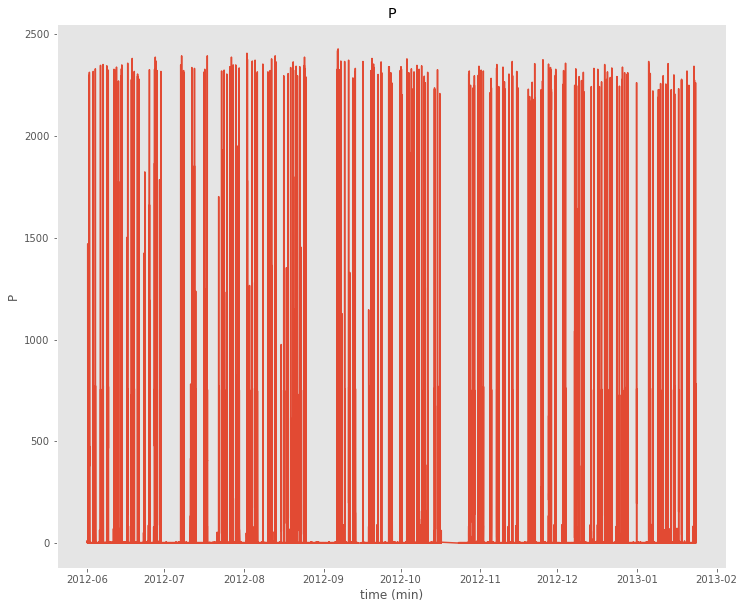

In [88]:

meter = dataset.buildings[1].elec.submeters().meters[4]
df = next(meter.load(physical_quantity='power'))

label = appliance_metadata.get("type")
instance = appliance_metadata.get("instance")
print(label,instance)


 #df = df.power.active #for iawe
fig, ax = plt.subplots()
ax.plot(df.fillna(0))

 
ax.set(xlabel='time (min)', ylabel='P', title='P')
ax.grid()

elec = dataset.buildings[2].elec#df.power.active[1900:1950]

In [90]:
ts = df.fillna(0).power.active.values.transpose()

In [207]:
more = ts[ts > 500]
print(len(more))
print(len(ts))
print("%",100*len(more)/len(ts))

152179
19670702
% 0.7736327864658821


array([17.2157, 30.0338, 25.7611, ..., 51.3965, 51.3965, 87.7112])

In [174]:
timestamps = df.index.view(np.int64)//10**9

In [180]:
diff = []
some_len = []
for i in range(len(timestamps)-1):
    diff = timestamps[i+1] - timestamps[i]
    
    if diff < 10 and ts[i] < 10:
        
    



In [195]:
count = 0
for element in diff:
    if element > 10:
        count+=1

In [196]:
count

151

In [144]:
arr = df.to_numpy()

In [187]:
np.array(timestamps)

array([1338508800, 1338508801, 1338508802, ..., 1358979606, 1358979607,
       1358979608], dtype=int64)

In [190]:
len(ts) == len(timestamps)

True

In [10]:
for building in dataset.buildings:
    print("------")
    for meter in dataset.buildings[building].elec.submeters().meters:
            
            # get name and instance of an appliance from metadata
            appliance_metadata = meter.appliances[0].metadata
            label = appliance_metadata.get("type")
            instance = appliance_metadata.get("instance")
            print(label,instance)
            

------
boiler 1
solar thermal pumping station 1
laptop computer 1
washer dryer 1
dish washer 1
television 1
light 1
HTPC 1
kettle 1
toaster 1
fridge freezer 1
microwave 1
computer monitor 1
audio system 1
breadmaker 1
audio amplifier 1
broadband router 1
light 3
soldering iron 1
ethernet switch 1
vacuum cleaner 1
light 4
light 5
light 16
light 6
tablet computer charger 1
active subwoofer 1
light 7
radio 1
light 8
wireless phone charger 1
light 9
mobile phone charger 1
light 10
coffee maker 1
radio 2
mobile phone charger 2
hair dryer 1
hair straighteners 1
clothes iron 1
oven 1
computer 1
light 11
light 12
baby monitor 1
charger 1
light 13
light 14
light 15
desktop computer 1
fan 1
printer 1
------
laptop computer 1
computer monitor 1
active speaker 1
computer 1
broadband router 1
external hard disk 1
kettle 1
rice cooker 1
running machine 1
laptop computer 2
washing machine 1
dish washer 1
fridge 1
microwave 1
toaster 1
games console 1
modem 1
cooker 1
------
kettle 1
electric space he